### 1. Importing Data, Setting Envt, Brief Glimpse of Data

####  1a: Importing Data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import seaborn as sb
import pylab as plt

from sklearn.neighbors import KernelDensity
import scipy.stats as stats
%matplotlib inline
full_df = pd.read_excel('vaderCityQ.xlsx', sheet_name = "CityQuarter")

#### 1b: Subsetting Data

In [31]:
# subsetting the data to remove count of reviews at bottom
df = full_df.iloc[0:13, :]

#### 1c: Mean by Date Group

In [32]:
just_cities = df.drop(["Quarter Start", "Grand Total"], axis = 1)
just_cities

pre2020 = just_cities.iloc[0:8,29]
post2020 = just_cities.iloc[9:,29]
overall_pos = just_cities.iloc[:,29]
print("pre 2020 ovr mean", round(pre2020.mean(),4),'\n'
     "post 2020 ovr mean", round(post2020.mean(),4),'\n'
     "ovr mean", round(overall_pos.mean(),4))

pre 2020 ovr mean 0.9543 
post 2020 ovr mean 0.957 
ovr mean 0.955


#### 1d: Number of Reviews for Each Quarter

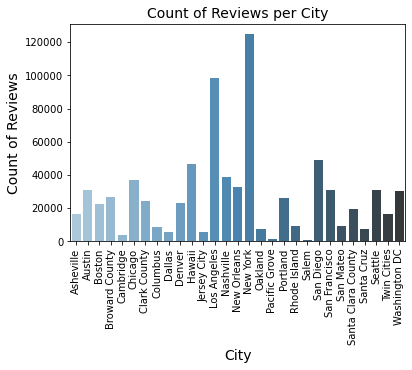

In [33]:
pop_df = pd.read_excel('vaderCityQ.xlsx', sheet_name = "Review Count")
# pop_df

sb.barplot(x = "city", y = "Total",  palette="Blues_d",data = pop_df, ci=None)

plt.xticks(rotation = 90)

plt.title("Count of Reviews per City", fontsize = 14)
plt.xlabel('City',fontsize=14)
plt.ylabel('Count of Reviews',fontsize=14)
plt.savefig('Reviews by City.png')

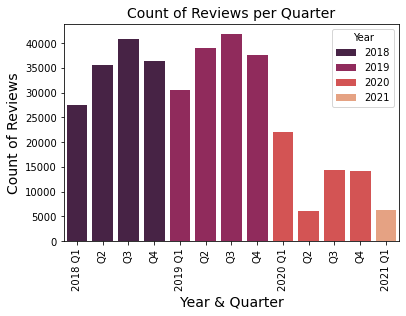

In [34]:
sb.barplot(x = "quarter", y = "Total", 
           palette="rocket", hue = "Year",
           data = pop_df, dodge = False, ci=None)

x_ticks = np.arange(0, 13, 1)
labels = ["2018 Q1", "Q2", "Q3", "Q4",
        "2019 Q1", "Q2", "Q3", "Q4",
        "2020 Q1", "Q2","Q3", "Q4",
        "2021 Q1"]

plt.xticks(ticks = x_ticks, labels = labels, rotation = 90)

plt.title("Count of Reviews per Quarter", fontsize = 14)
plt.xlabel('Year & Quarter',fontsize=14)
plt.ylabel('Count of Reviews',fontsize=14)

plt.savefig('Reviews by Quarter.png')
# sb.regplot(x="quarter", y="Total", data = pop_df)

### 2. Looking at Positivity Throughout Each Quarter

#### 2a: Plotting the Overall Mean

<ipython-input-35-fc25fcb24561>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x * 100) for x in y_vals])


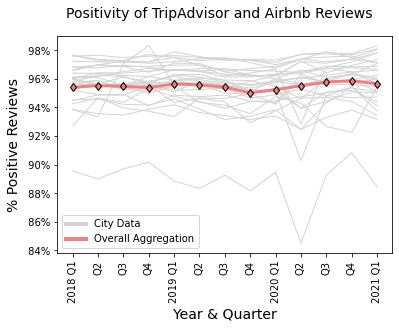

<Figure size 432x288 with 0 Axes>

In [35]:
# plotting overall mean with cities grayed out
col_names = just_cities.columns.drop("overall")

fig, ax = plt.subplots()

for i in range(len(col_names)):
    ax.plot(df[col_names[i]], linewidth = 1, color = "lightgray")

plt.plot(df["overall"], linewidth = 3, color = "lightcoral", marker = "d", markeredgecolor='black')

plt.xticks(x_ticks, labels, rotation = 90)
plt.suptitle('Positivity of TripAdvisor and Airbnb Reviews', fontsize = 14)
# plt.title('Data is aggregation from TripAdvisor and Airbnb reviews', fontsize = 10)


y_vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x * 100) for x in y_vals])

plt.xlabel('Year & Quarter',fontsize=14)
plt.ylabel('% Positive Reviews',fontsize=14)


custom_lines = [Line2D([0], [0], color= "lightgray", label = "City Data", lw=4),
                Line2D([0], [0], color="lightcoral", label = "Overall Aggregation", lw=4)]
ax.legend(handles=custom_lines, loc='best')

plt.show()
plt.savefig('Review Positivity Lineplot.png')

#### 2b: Highlighting the Cities With Positivity Dips in Q2 2020

Index(['Dallas', 'Cambridge', 'Pacific Grove', 'New Orleans', 'Boston',
       'Chicago', 'New York', 'Oakland', 'Santa Clara County', 'Denver'],
      dtype='object')


<ipython-input-36-5087c529278c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x * 100) for x in y_vals])


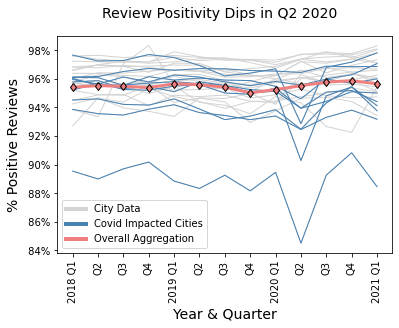

<Figure size 432x288 with 0 Axes>

In [36]:
# plotting for my own sake
col_names = just_cities.columns.drop("overall")
indices = [0,1,2,3,4,5,6,7,10,11]
print(col_names[indices])
q2_2020_dip_cols = col_names[indices]

fig, ax = plt.subplots()

for i in range(len(col_names)):
    ax.plot(df[col_names[i]], linewidth = 1, color = "lightgray")
    
for i in range(len(q2_2020_dip_cols)):
    ax.plot(df[q2_2020_dip_cols[i]], linewidth = 1, color = "steelblue")    
    
plt.plot(df["overall"], linewidth = 3, color = "lightcoral", marker = "d", markeredgecolor='black')

plt.xticks(x_ticks, labels, rotation = 90)
plt.suptitle('Review Positivity Dips in Q2 2020', fontsize = 14)
# plt.title('Data is aggregation from TripAdvisor and Airbnb reviews', fontsize = 10)


y_vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x * 100) for x in y_vals])

plt.xlabel('Year & Quarter',fontsize=14)
plt.ylabel('% Positive Reviews',fontsize=14)


custom_lines = [Line2D([0], [0], color= "lightgray", label = "City Data", lw=4),
                Line2D([0], [0], color= "steelblue", label = "Covid Impacted Cities", lw=4),
                Line2D([0], [0], color="lightcoral", label = "Overall Aggregation", lw=4)]
ax.legend(handles=custom_lines, loc='best')

plt.show()
plt.savefig('Review Positivity Dips.png')

### 3. Assessing the Positivity Rankings of Each Quarter

#### 3a: Plotting the Average Ranking by Quarter

Some things to note:  
a) 7 would be the completely randomized expected ranking because there are 13 quarters observed.  
b) The lower the ranking, the higher the negativity score.  
c) The only rankings below the expected threshold of 7 are 2019 Q3 - 2020 Q2.

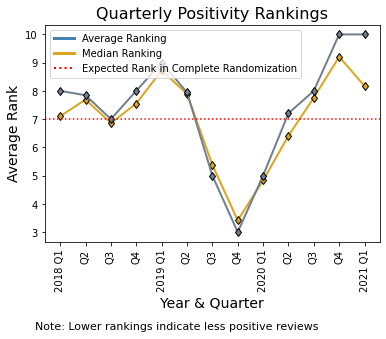

In [37]:
rank_df = df
# new_df["Dallas"] = new_df["Dallas"].rank()
# new_df

col_names = rank_df.columns.drop(["Quarter Start", "Grand Total", "overall"])
rank_df=rank_df.drop(["Quarter Start", "Grand Total", "overall"], axis = 1)
for i in range(len(col_names)):
    rank_df[col_names[i]] = rank_df[col_names[i]].rank()

rank_df["Avg Rank"] = rank_df.mean(axis = 1)
rank_df["Median Rank"] = rank_df.median(axis = 1)


plt.xticks(x_ticks, labels, rotation = 90)

plt.title("Quarterly Positivity Rankings", fontsize=16)
plt.xlabel('Year & Quarter',fontsize=14)
plt.ylabel('Average Rank',fontsize=14)

plt.plot(rank_df["Avg Rank"], linewidth = 2, color = "goldenrod", marker = "d", markeredgecolor='black')
plt.plot(rank_df["Median Rank"], linewidth = 2, color = "slategrey", marker = "d", markeredgecolor='black')
plt.axhline(y=7, color='red', linestyle=':')

txt= 'Note: Lower rankings indicate less positive reviews'
plt.figtext(0.43, -.18, txt, wrap=True, horizontalalignment='center', fontsize=11)

custom_lines = [Line2D([0], [0], color= "steelblue", label = "Average Ranking", lw=3),
                Line2D([0], [0], color= "goldenrod", label = "Median Ranking", lw=3),
                Line2D([0], [0], color="red", label = "Expected Rank in Complete Randomization", lw=2, linestyle = ':')]
plt.legend(handles=custom_lines, loc='best')
plt.savefig('Rankings by Quarter.png')

#### 3b: Creating a Heatmap to Visualize the Rankings

In [38]:
 # this sections is just for me to look at the rankings df
ranked_just_cities = rank_df[[c for c in df.columns if c in col_names]]
rot = ranked_just_cities.T
rot.iloc[:, 9]<4
ranked_just_cities

,Dallas,Cambridge,Pacific Grove,New Orleans,Boston,Chicago,New York,Oakland,Jersey City,Los Angeles,...,Clark County,Seattle,Asheville,Rhode Island,San Mateo,Broward County,Salem,Hawaii,Twin Cities,San Francisco
0,10.0,11.0,11.0,8.0,10.0,13.0,11.0,10.0,13.0,7.0,...,13.0,3.0,8.0,1.0,12.0,1.0,2.0,6.0,3.0,10.0
1,6.0,13.0,8.0,13.0,11.0,8.0,8.0,9.0,12.0,11.0,...,10.0,7.0,6.0,3.0,10.0,12.0,1.0,9.0,7.0,7.0
2,11.0,7.0,9.0,9.0,8.0,9.0,7.0,3.0,11.0,10.0,...,12.0,4.0,3.0,7.0,13.0,7.0,8.0,7.0,6.0,8.0
3,12.0,9.0,12.0,7.0,7.0,11.0,12.0,11.0,8.0,5.0,...,11.0,6.0,2.0,4.0,11.0,5.0,13.0,4.0,9.0,1.0
4,5.0,5.0,10.0,11.0,12.0,12.0,13.0,6.0,10.0,12.0,...,6.0,9.0,12.0,6.0,7.0,3.0,5.0,11.0,2.0,5.0
5,3.0,12.0,6.0,12.0,6.0,10.0,9.0,8.0,6.0,13.0,...,7.0,8.0,7.0,9.0,6.0,11.0,4.0,10.0,5.0,4.0
6,7.0,10.0,2.0,5.0,2.0,7.0,6.0,5.0,4.0,8.0,...,9.0,1.0,4.0,10.0,9.0,8.0,3.0,5.0,4.0,6.0
7,2.0,4.0,3.0,3.0,3.0,6.0,2.0,4.0,3.0,1.0,...,1.0,2.0,5.0,5.0,4.0,2.0,6.0,2.0,8.0,3.0
8,9.0,6.0,4.0,10.0,5.0,4.0,5.0,2.0,7.0,9.0,...,5.0,5.0,1.0,2.0,2.0,6.0,7.0,1.0,1.0,2.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,6.0,...,8.0,12.0,10.0,8.0,8.0,10.0,10.0,12.0,11.0,13.0


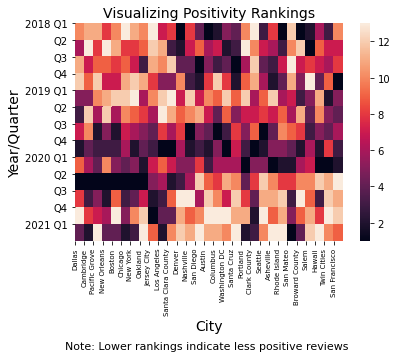

In [39]:
# heatmap of rankings
heatmap_df = df.drop("Grand Total", axis = 1)
# heatmap_df['year'] = pd.DatetimeIndex(heatmap_df['Quarter Start']).year
# heatmap_df['month'] = pd.DatetimeIndex(heatmap_df['Quarter Start']).month
heatmap_df = heatmap_df.drop("Quarter Start", axis = 1)
# dallas = heatmap_df.pivot("month", "year", "Dallas")
ax = sb.heatmap(ranked_just_cities)

y_ticks = np.arange(0, 13, 1)
labels = ["2018 Q1", "Q2", "Q3", "Q4",
        "2019 Q1", "Q2", "Q3", "Q4",
        "2020 Q1", "Q2","Q3", "Q4",
        "2021 Q1"]

plt.yticks(y_ticks, labels, rotation = 0)
ax.set_xticks(range(len(ranked_just_cities.columns)))
ax.set_xticklabels(ranked_just_cities.columns, rotation=90, fontsize = 7)

plt.title('Visualizing Positivity Rankings', fontsize = 14)
txt= 'Note: Lower rankings indicate less positive reviews'
plt.figtext(0.43, -.25, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.xlabel('City',fontsize=14)
plt.ylabel('Year/Quarter',fontsize=14)
plt.savefig('Positivity Rankings.png')

### 4. Calculating P-Value for Observed Positivity Scores

Note:  
Since we're only using one data column (overall to look at generalized behavior) and we only have 13 observed time periods, it'd be unnecessary/uninformative to do a time series due to small sample size.   

Additionally time-series usually indicate some predictable behavior, but in the case of reviews we're not expecting a unionized growth/decay of positivity in normal circumstances.  

#### 4a: Creating Cols for z & p

In [40]:
# calculating the p val
likelihood_df = df
print(likelihood_df["overall"].std())
# likelihood_df["overall"]


likelihood_df["z score"] = stats.zscore(likelihood_df["overall"])

likelihood_df["p val"] = stats.norm.sf(abs(likelihood_df["z score"]))*2

# likelihood_df


0.002210588855672003


<ipython-input-40-6e9c0930a30d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likelihood_df["z score"] = stats.zscore(likelihood_df["overall"])
<ipython-input-40-6e9c0930a30d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likelihood_df["p val"] = stats.norm.sf(abs(likelihood_df["z score"]))*2


#### 4b: Plotting the p-score with $\alpha$ =  0.05

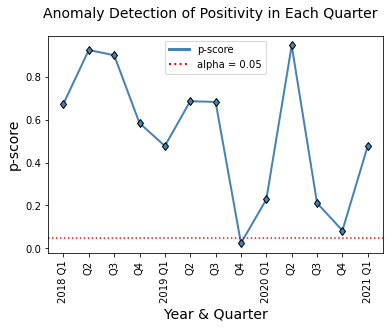

In [41]:
# plotting the p values and identifying alpha of 0.05 [signicantly outside of the mean of the dataset]
fig, ax = plt.subplots()

ax.plot(likelihood_df["p val"], linewidth = 2, color = "steelblue", marker = "d", markeredgecolor='black')
plt.axhline(y=0.05, color='r', linestyle=':')

plt.xticks(x_ticks, labels, rotation = 90)

plt.suptitle("Anomaly Detection of Positivity in Each Quarter", fontsize = 14)
plt.xlabel('Year & Quarter',fontsize=14)
plt.ylabel('p-score',fontsize=14)
# ax.set_yticklabels(['{:3.0f}%'.format(x * 100) for x in y_vals])

custom_lines = [Line2D([0], [0], color= "steelblue", label = "p-score", lw=3),
                Line2D([0], [0], color="red", label = "alpha = 0.05", lw=2, linestyle = ':')]

ax.legend(handles=custom_lines, loc='best')
plt.savefig('Overall Positivity Anomalies.png')

In [42]:
# ignore

# x = np.linspace(0, 16, 1000)[:, np.newaxis]
# norm_vals = mlab.normpdf(x, 5, 1) * 0.25 + mlab.normpdf(x, 10, 1) * 0.75
# plt.plot(x, norm_vals)

# kd = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(just_cities.iloc[0:13, 0])

# # Plot the estimated densty
# kd_vals = np.exp(kd.score_samples(just_cities.iloc[0:13, 0]))
# plt.plot(just_cities.iloc[0:13, 0], kd_vals)

# # Show the plots
# plt.show()

# # Get probability for range of values
# start = 5  # Start of the range
# end = 6    # End of the range
# N = 100    # Number of evaluation points 
# step = (end - start) / (N - 1)  # Step size
# x = np.linspace(start, end, N)[:, np.newaxis]  # Generate values in the range
# kd_vals = np.exp(kd.score_samples(x))  # Get PDF values for each x
# probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
# print(probability)

In [43]:
# ignore
# from sklearn.ensemble import IsolationForest

# X = df["overall"]
# clf = IsolationForest(n_estimators=10, warm_start=True)
# clf.fit(X)  # fit 10 trees  
# clf.set_params(n_estimators=20)  # add 10 more trees  
# clf.fit(X)  # fit the added trees  